# Importing necessary labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv("C:\\Users\\Dhanshree\\Downloads\\archive (12).zip")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
df.shape

(1275, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

# checking for null values

In [8]:
df.isna().sum() #no null values are there

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

# checking for duplicacy

In [9]:
df.duplicated().sum() #no duplictes values in the data

0

# Separating the numerical columns and categorical columns for their respective treatment processes.

In [10]:
num_col = [var for var in df.columns if df[var].dtype != 'O']

In [11]:
num_col

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [12]:
cat_col = [var for var in df.columns if df[var].dtype == 'O']

In [13]:
cat_col

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [14]:
num_data = df[num_col]

In [15]:
num_data.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


In [16]:
num_data.shape

(1275, 9)

In [17]:
# Add the existing index as a new column
num_data = num_data.reset_index()

In [18]:
num_data.head()

,index,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


In [19]:
num_data.rename(columns={'index':'ID'},inplace=True)

In [20]:
num_data.head(3)

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,2,15.6,8,1.86,575.00,1920,1080,2.5,256,0


In [21]:
cat_data = df[cat_col]

In [22]:
cat_data.head()

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,macOS,Standard,No,No,No,Intel,Core i5,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,No OS,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i7,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 650


In [23]:
cat_data.shape

(1275, 14)

In [24]:
# Add the existing index as a new column
cat_data = cat_data.reset_index()

In [25]:
cat_data.head()

,index,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,0,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 640
1,1,Apple,Macbook Air,Ultrabook,macOS,Standard,No,No,No,Intel,Core i5,Flash Storage,No,Intel,HD Graphics 6000
2,2,HP,250 G6,Notebook,No OS,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
3,3,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i7,SSD,No,AMD,Radeon Pro 455
4,4,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 650


In [26]:
cat_data.rename(columns={'index':'ID'}, inplace=True)

In [27]:
cat_data.head(3)

,ID,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,0,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 640
1,1,Apple,Macbook Air,Ultrabook,macOS,Standard,No,No,No,Intel,Core i5,Flash Storage,No,Intel,HD Graphics 6000
2,2,HP,250 G6,Notebook,No OS,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620


***for merging data*** 

***there must be atleast 1 common nominal categorical variable in the two datasets***

***no of rows should be exactly same.*** 
   #that's why i created id column

# Working on numerical dataset

In [28]:
num_data.head()

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0


# Outlier detection and treatment

In [29]:
num_data.columns

Index(['ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')

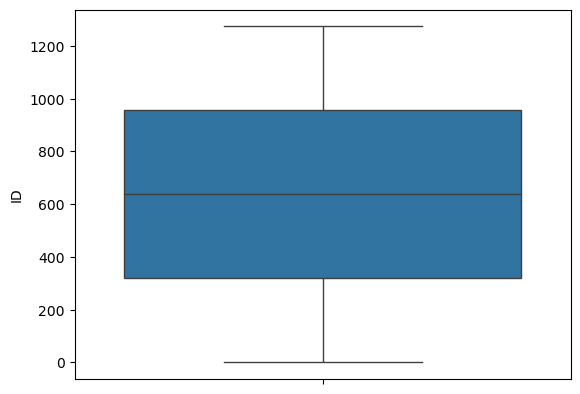

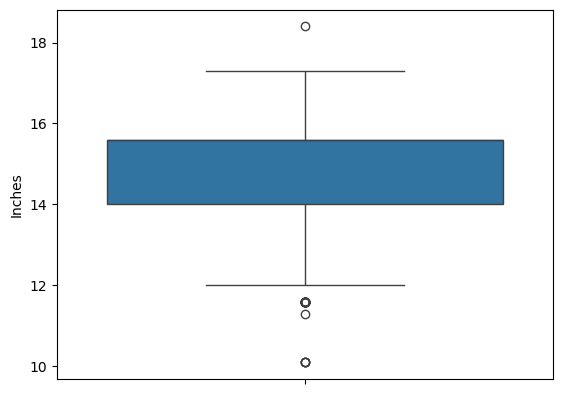

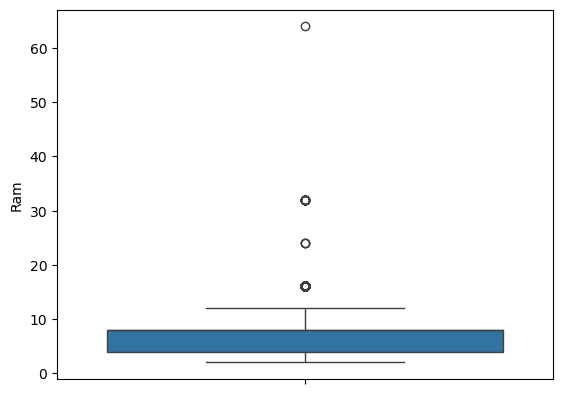

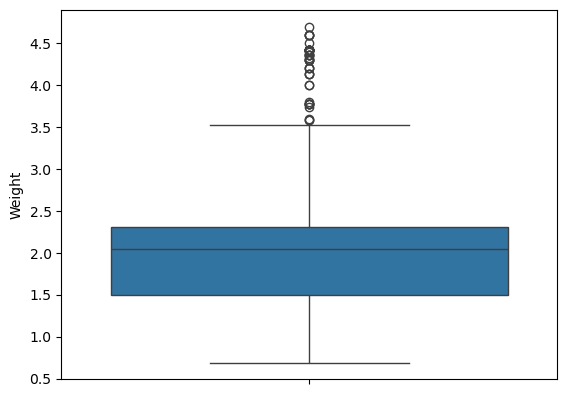

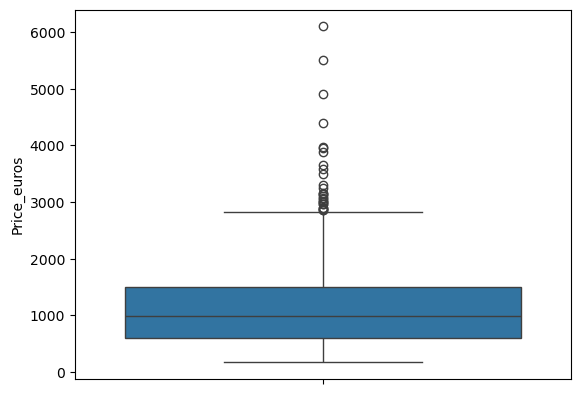

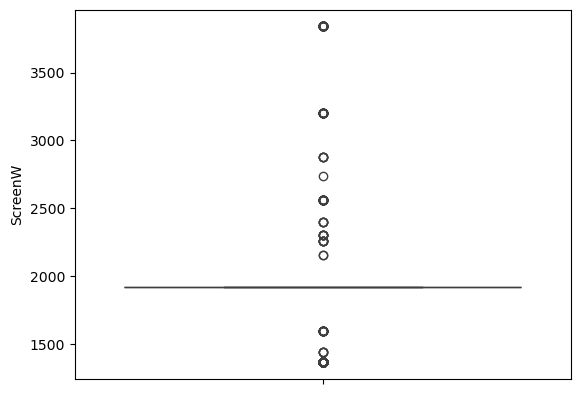

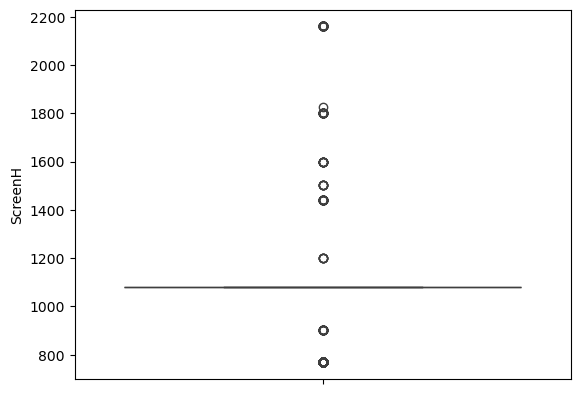

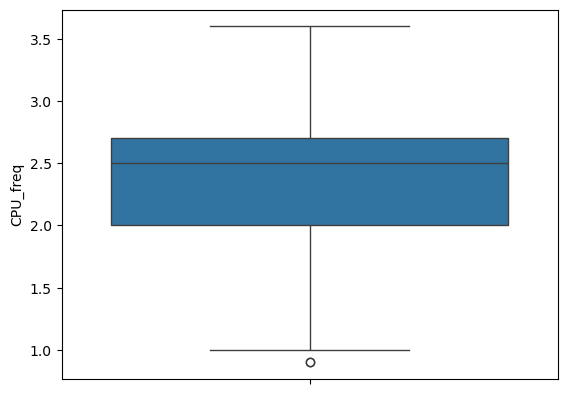

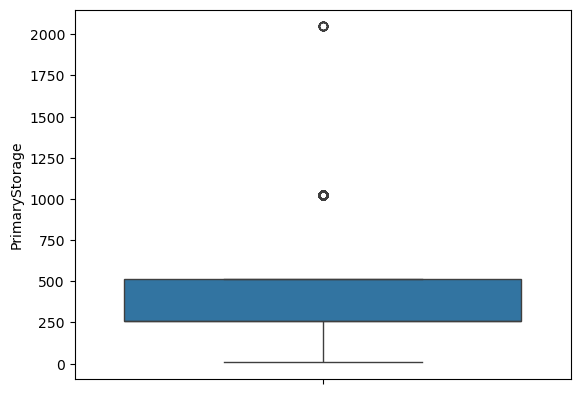

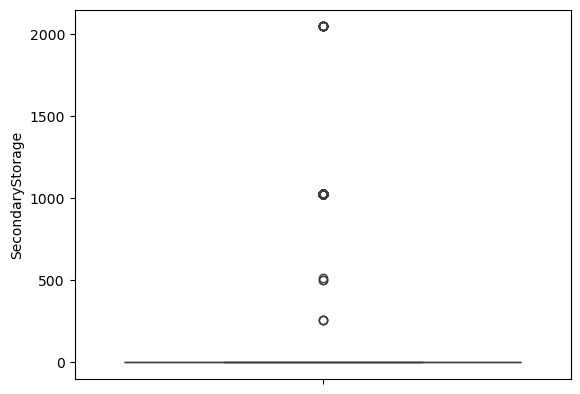

In [30]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [31]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [32]:
num_data.apply(outliertreat_IQR)

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,-637.0,11.6,-2.0,0.285,-722.25,1920.0,1080.0,0.95,-128.0,0.0
1,1911.0,18.0,14.0,3.525,2827.75,1920.0,1080.0,3.75,896.0,0.0


In [33]:
num_data['Inches'] = num_data['Inches'].clip(lower = 11.6,upper = 18.0)
num_data['Ram'] = num_data['Ram'].clip(lower = -2.0,upper = 14.0)
num_data['Weight'] = num_data['Weight'].clip(lower = 0.285,upper = 3.525)
num_data['Price_euros'] = num_data['Price_euros'].clip(lower = -722.25,upper = 2827.75)
num_data['ScreenW'] = num_data['ScreenW'].clip(lower = 1920.0,upper = 1920.0)
num_data['ScreenH'] = num_data['ScreenH'].clip(lower = 1080.0,upper = 1080.0)
num_data['CPU_freq'] = num_data['CPU_freq'].clip(lower = 0.95,upper = 3.75)
num_data['PrimaryStorage'] = num_data['PrimaryStorage'].clip(lower = 0.0,upper = 0.0)

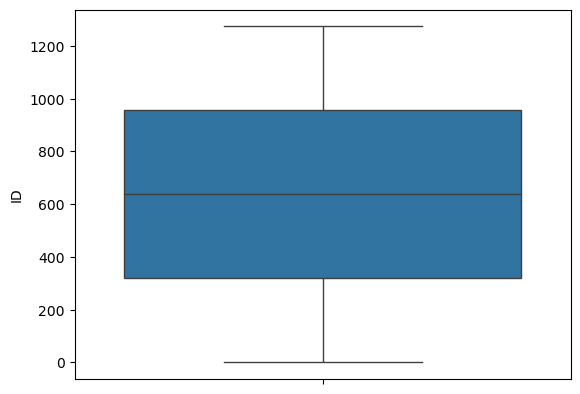

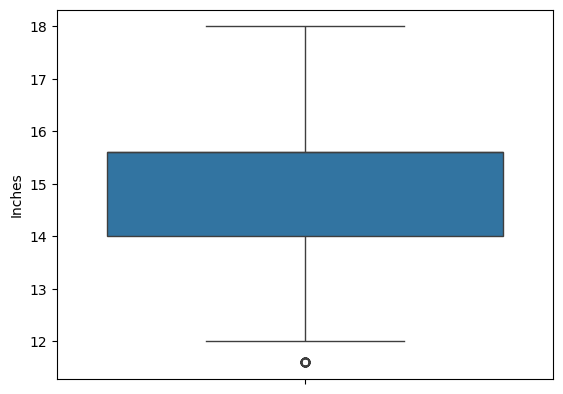

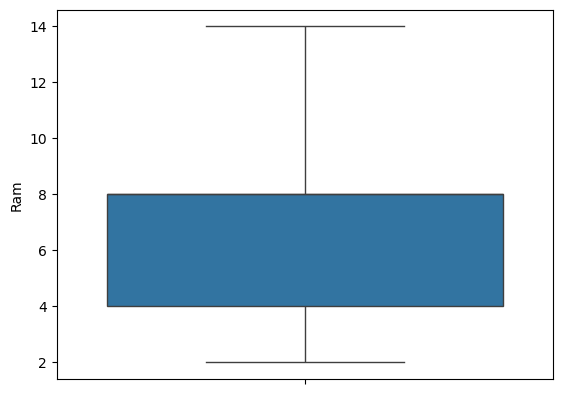

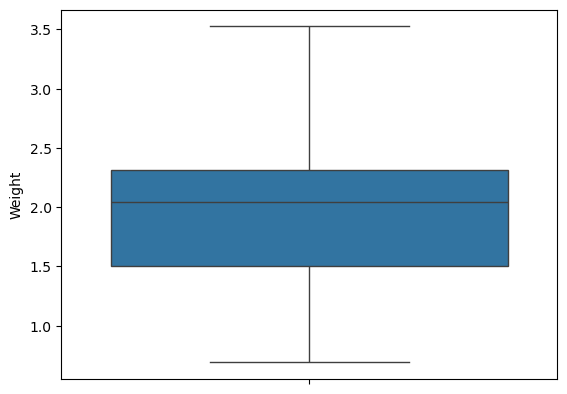

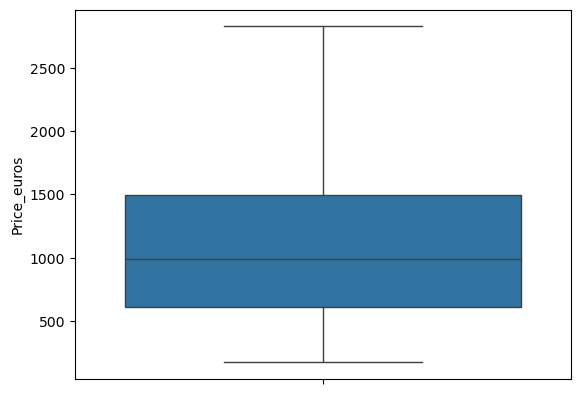

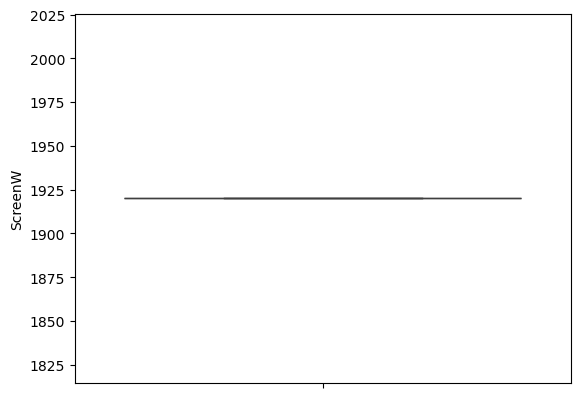

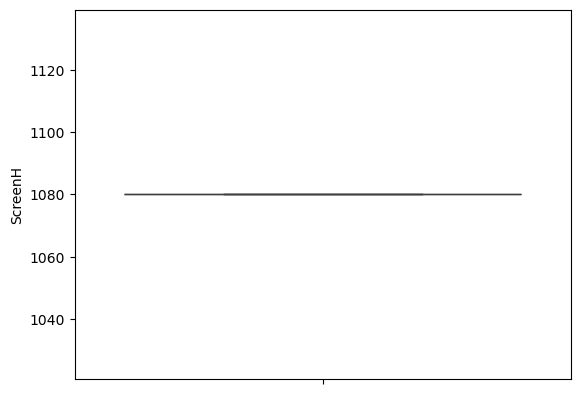

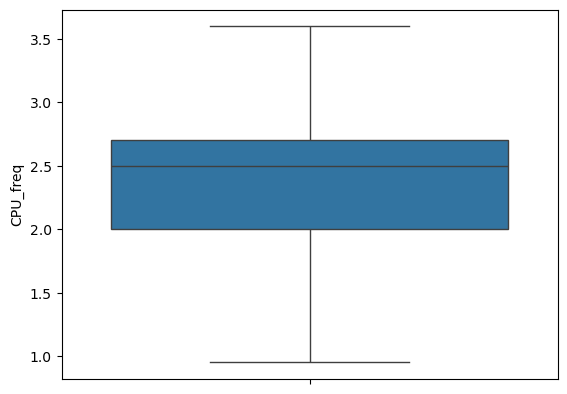

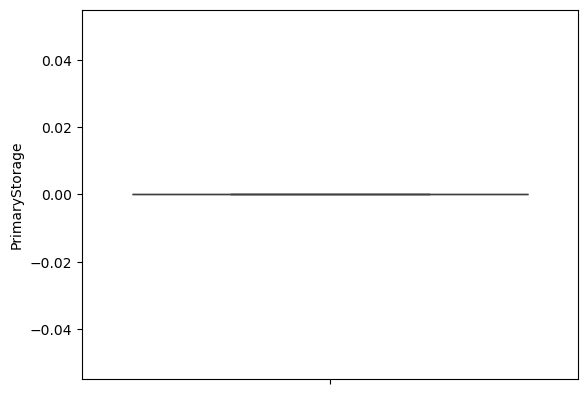

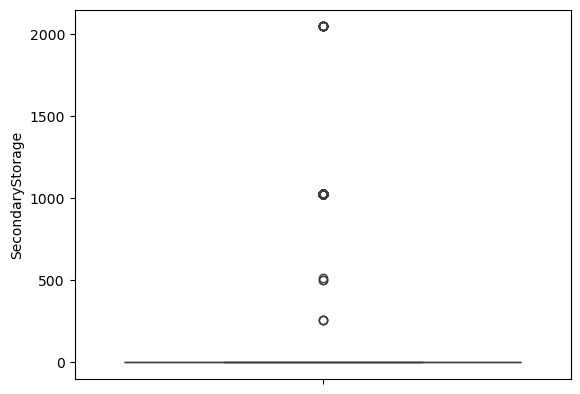

In [34]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

# Checking and Converting the Probability Distribution to Normal Distribution:

In [35]:
num_data.columns

Index(['ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')

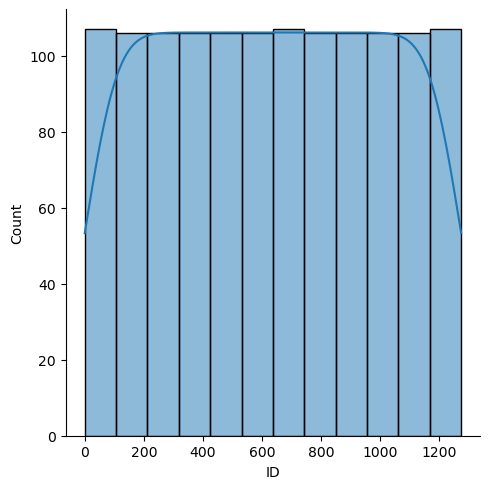

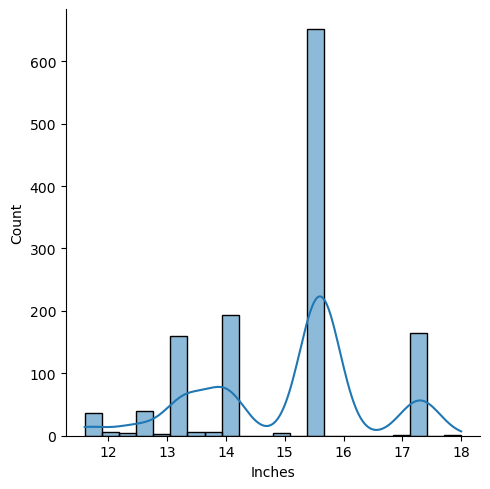

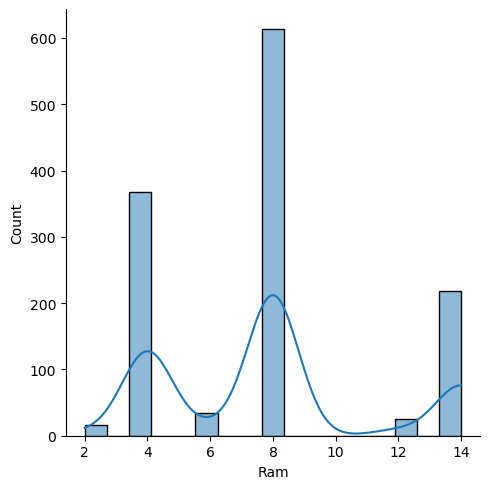

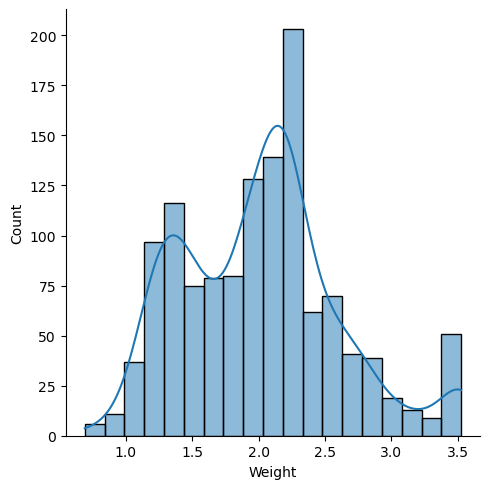

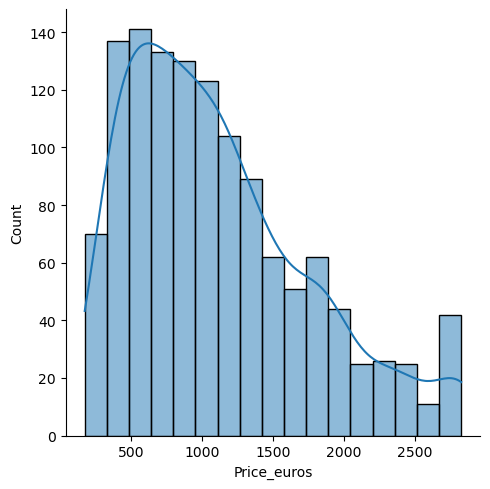

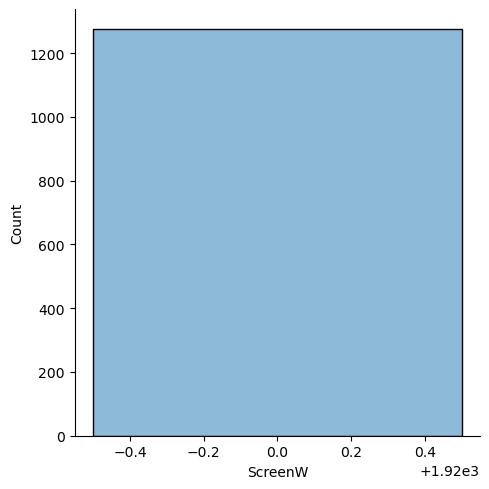

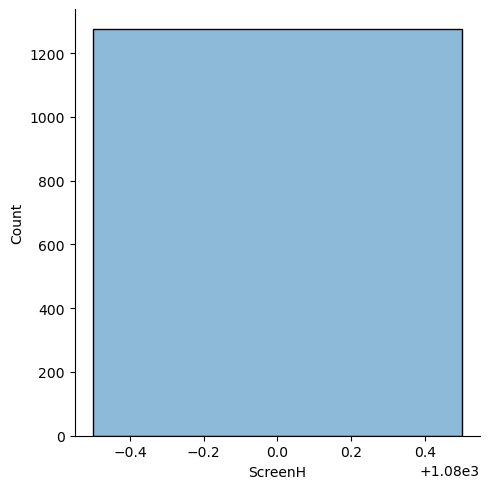

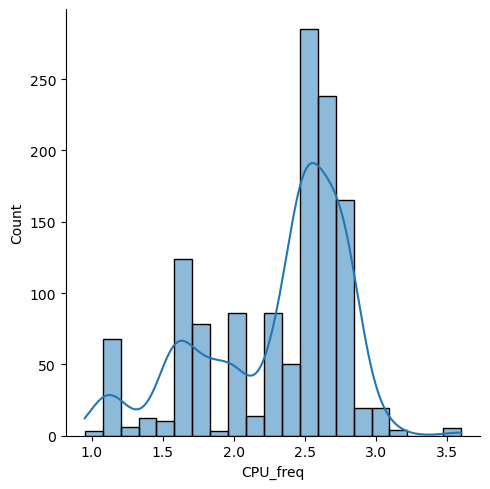

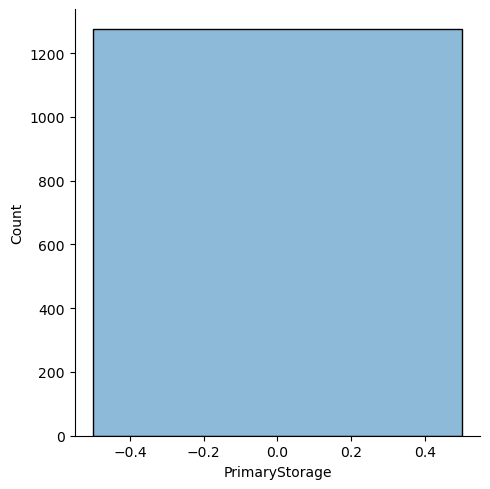

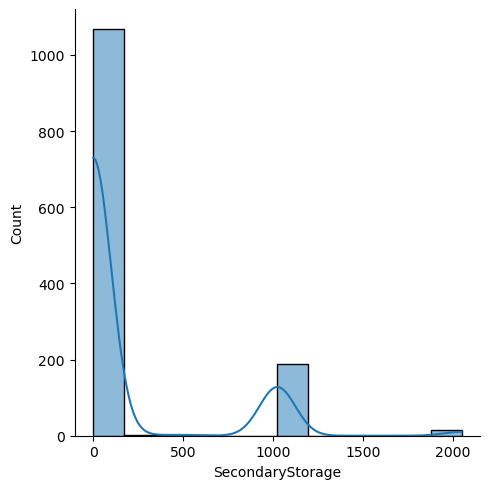

In [36]:
for i in num_data.columns:
    sns.displot(num_data[i],kde =True)
    plt.show()

# Logarithmic Transformations on the Random distribution to convert it into Normal distribution

C:\Users\Dhanshree\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


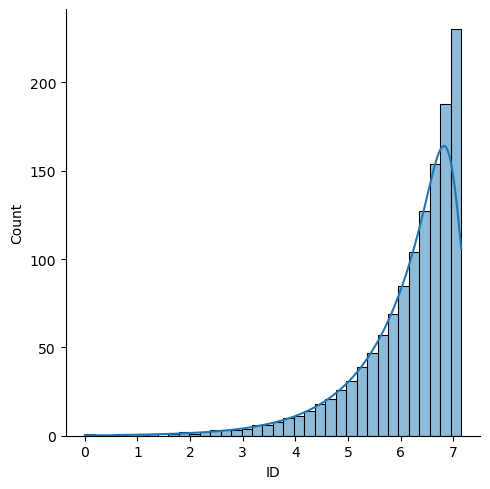

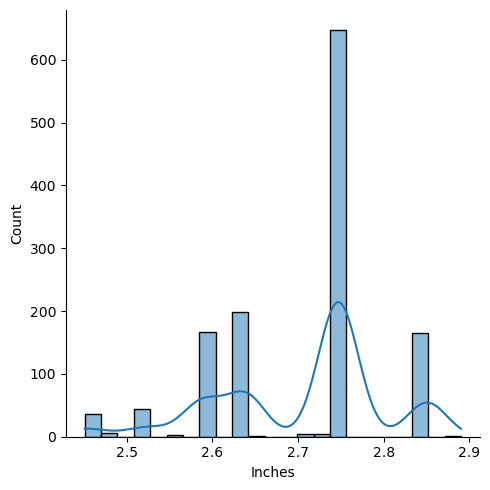

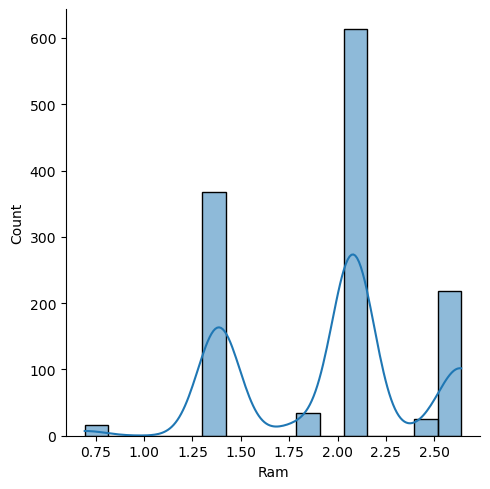

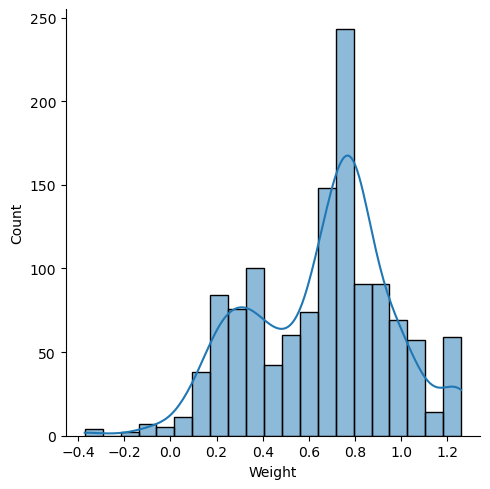

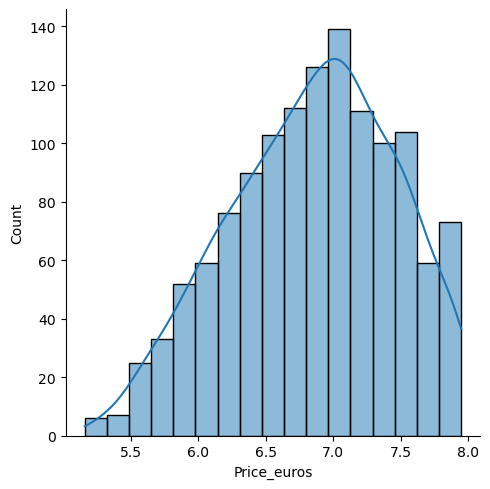

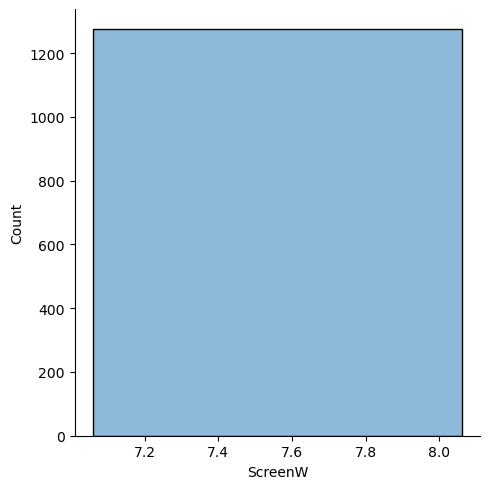

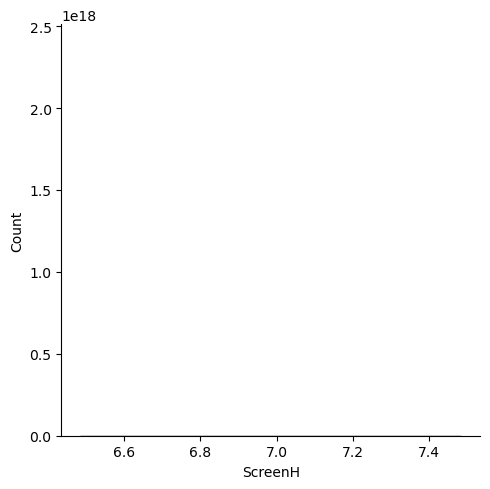

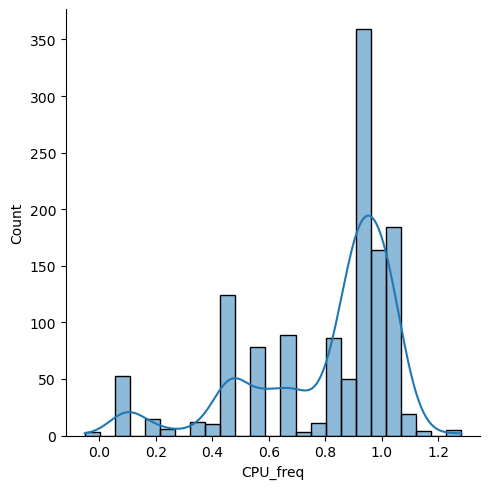

C:\Users\Dhanshree\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


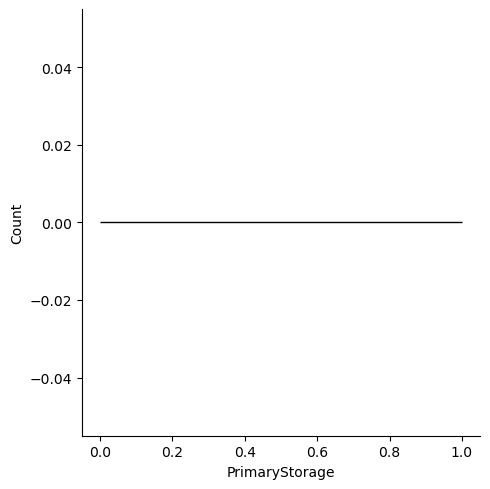

C:\Users\Dhanshree\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


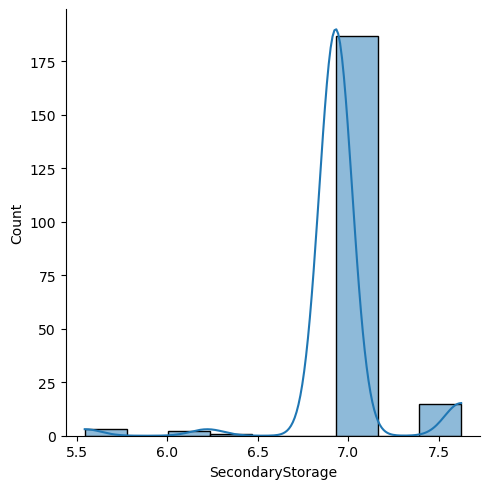

In [37]:
for i in num_data.columns:
    sns.displot(np.log(num_data[i]),kde =True)
    plt.show()

# Squareroot Transformations on the Random distribution to convert it into Normal distribution

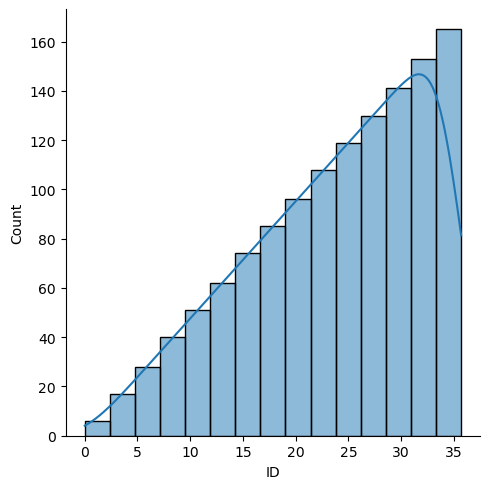

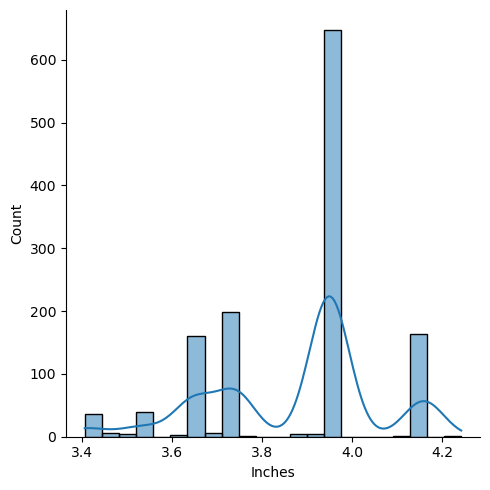

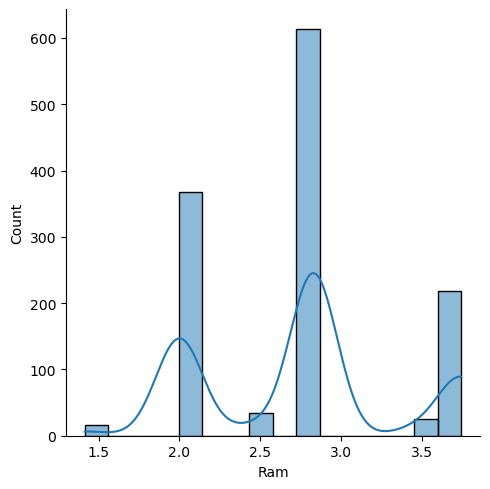

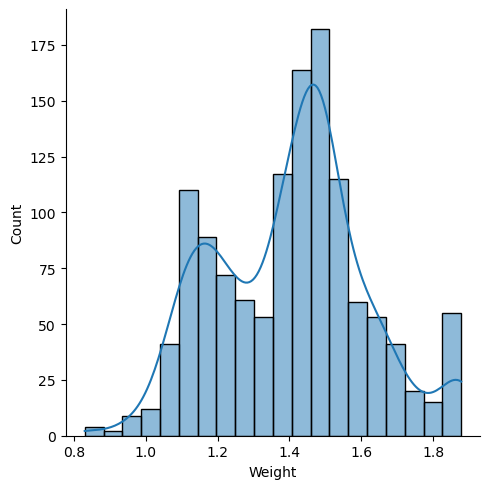

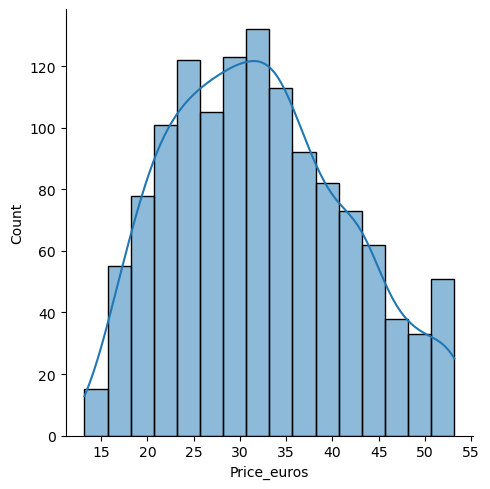

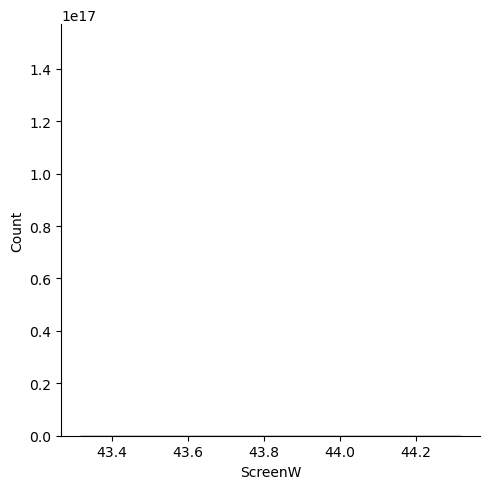

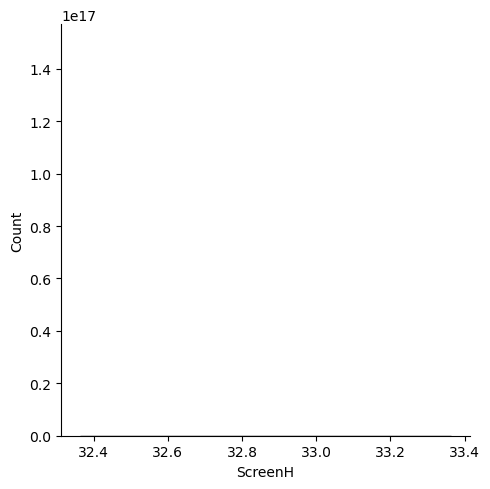

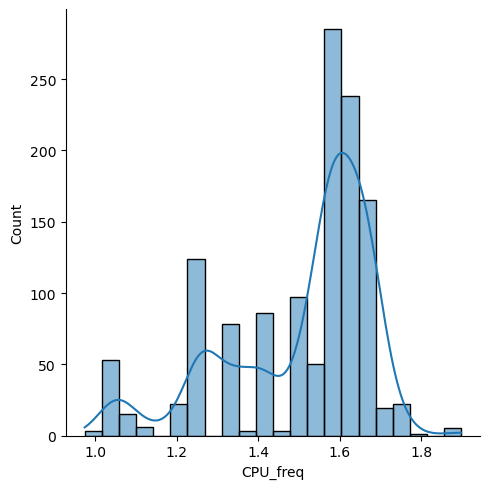

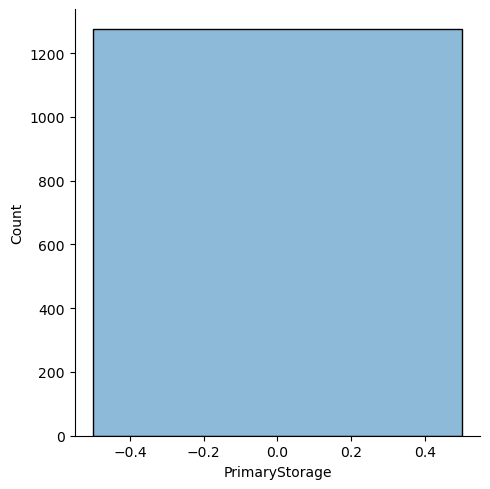

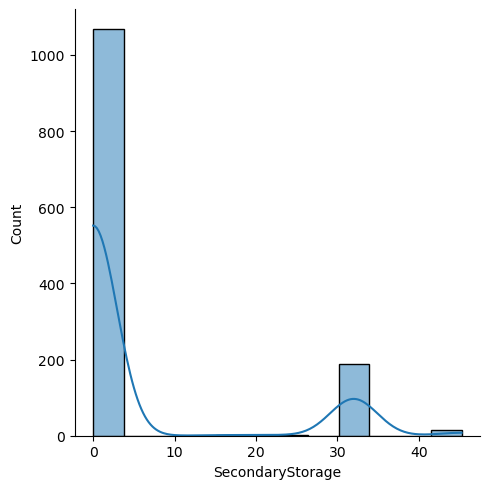

In [38]:
for i in num_data.columns:
    sns.displot(np.sqrt(num_data[i]),kde =True)
    plt.show()

# Square Transformations on the Random distribution to convert it into Normal distribution¶

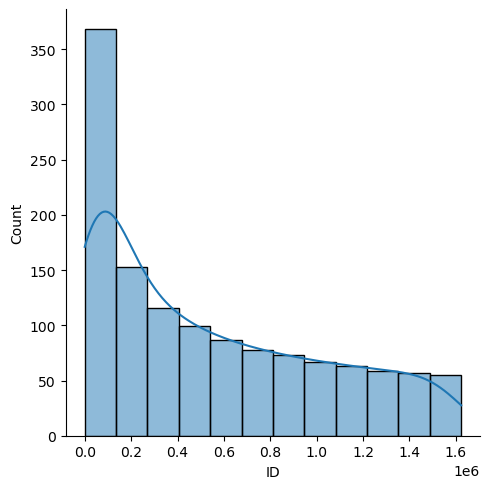

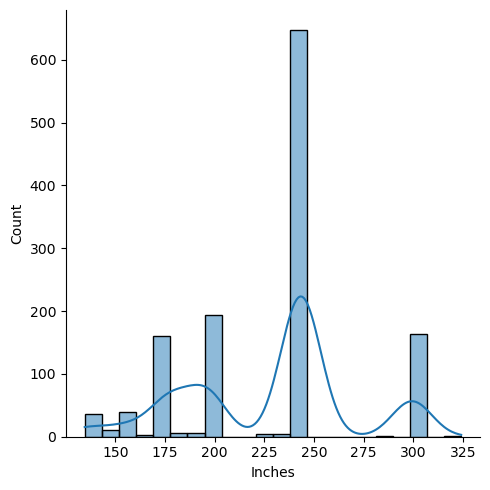

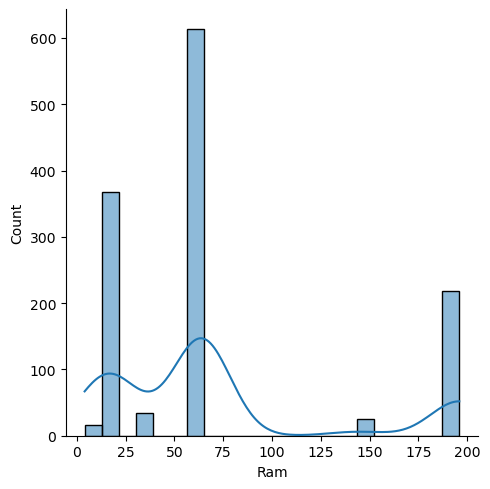

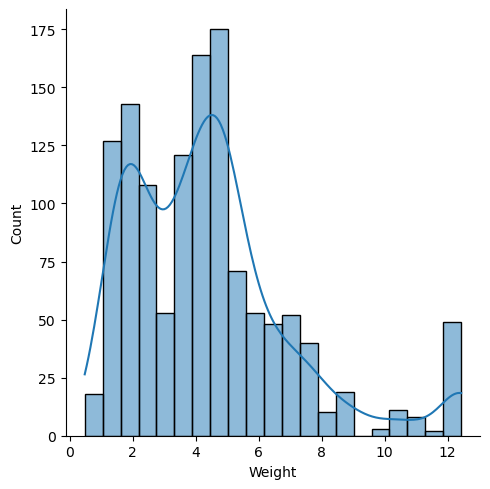

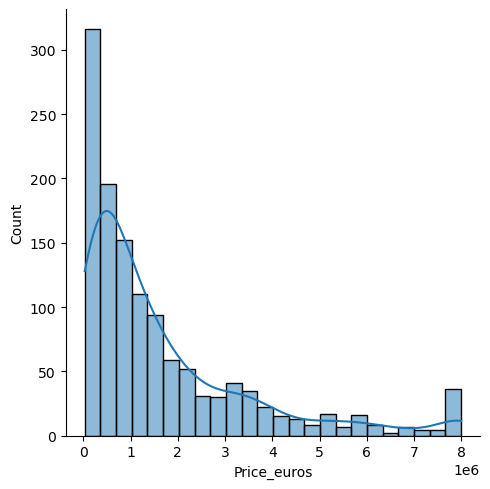

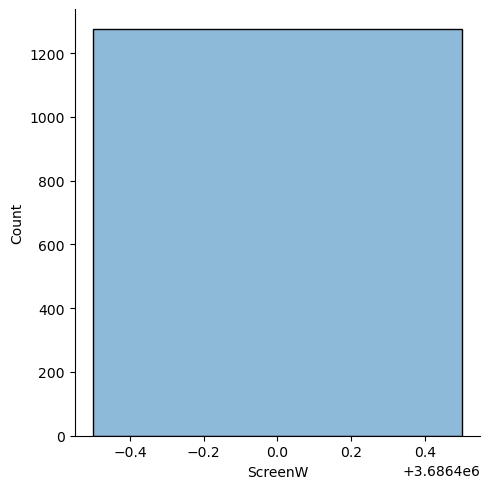

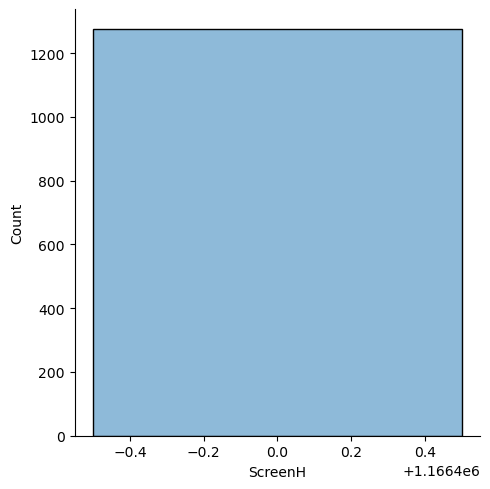

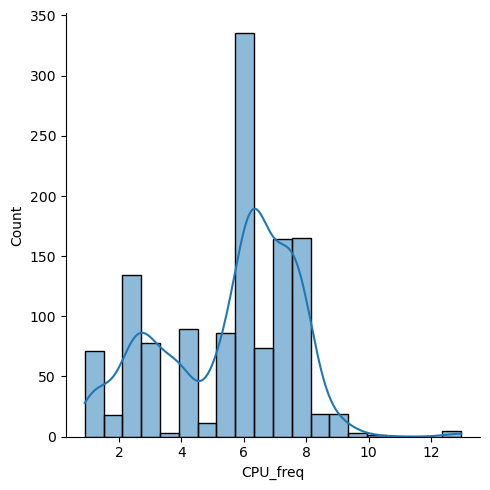

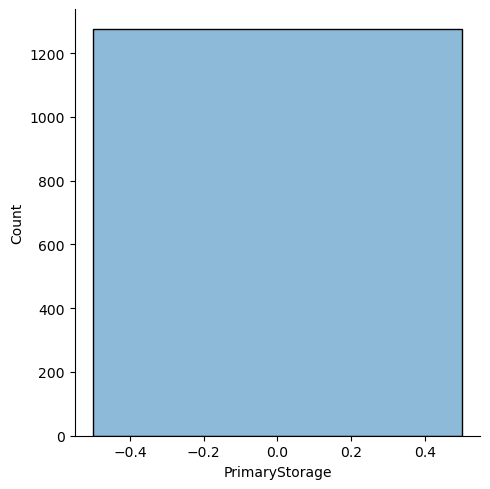

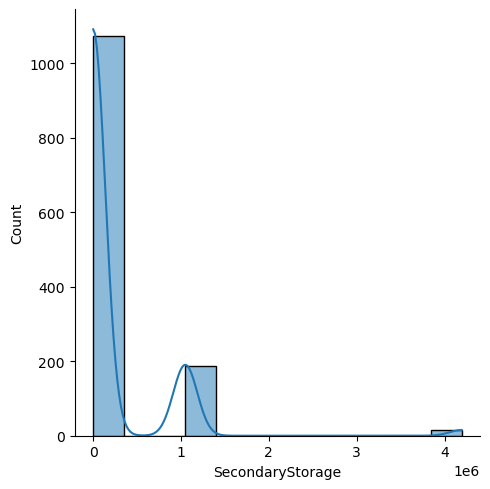

In [39]:
for i in num_data.columns:
    sns.displot(np.square(num_data[i]),kde =True)
    plt.show()

# Cuberoot Transformations on the Random distribution to convert it into Normal distribution

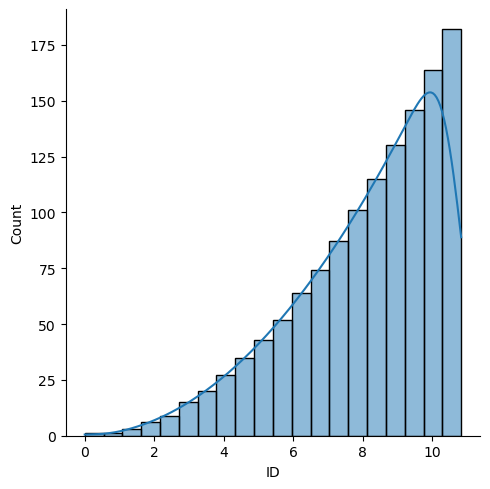

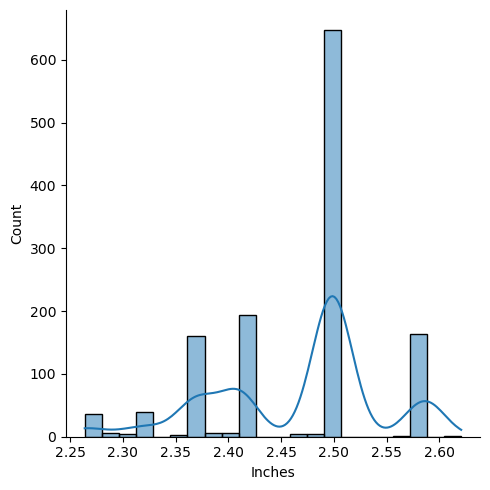

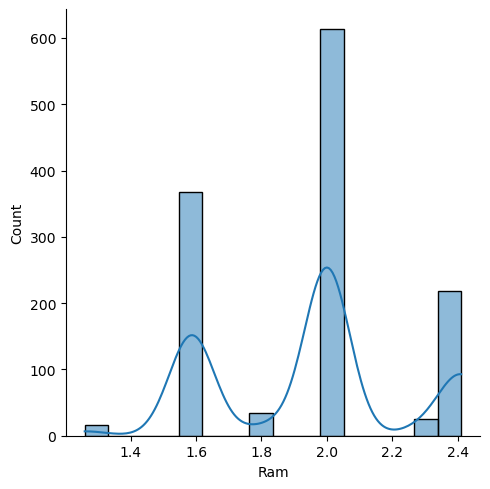

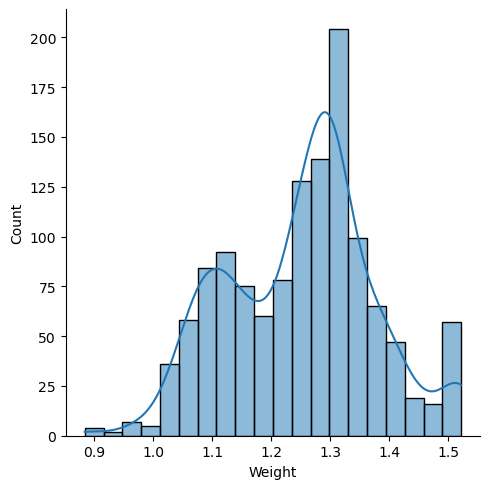

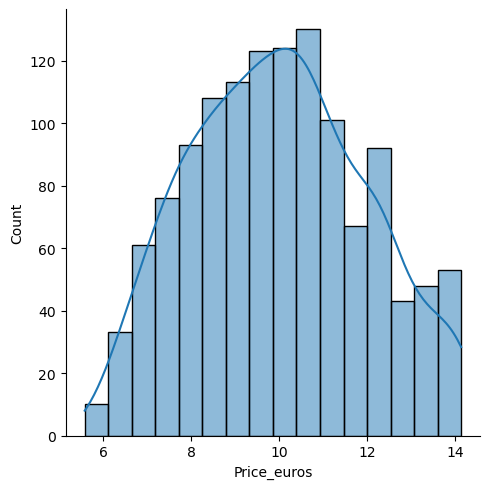

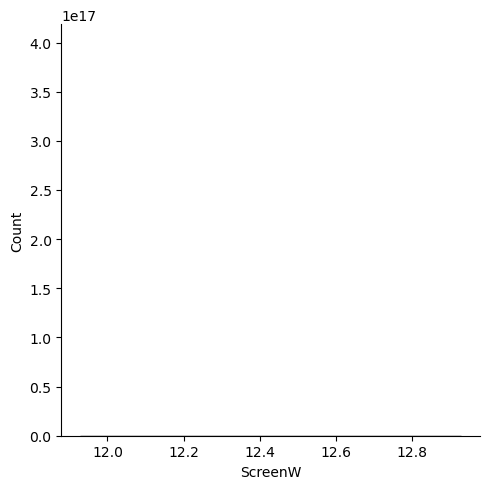

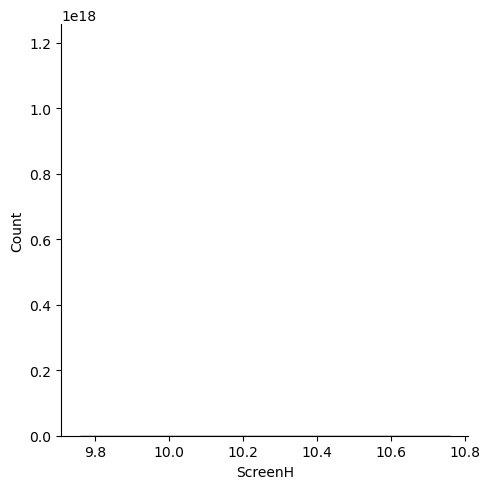

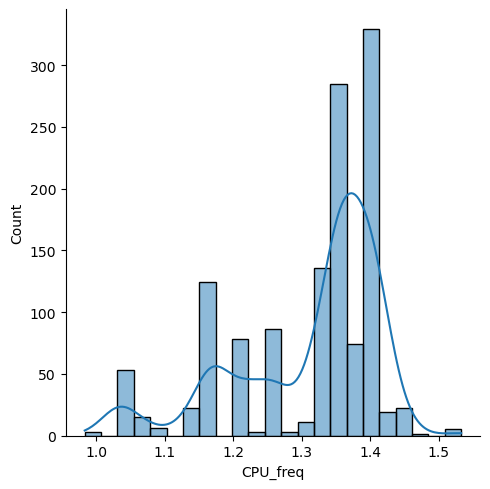

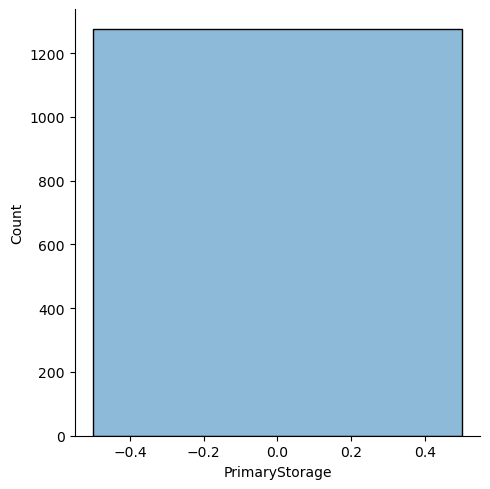

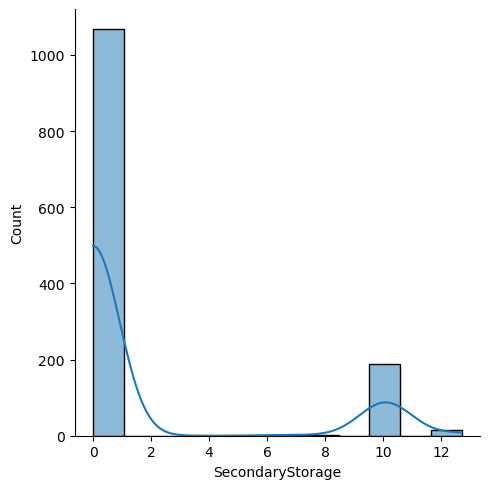

In [40]:
for i in num_data.columns:
    sns.displot(np.cbrt(num_data[i]),kde =True)
    plt.show()

# Applying Logarithmic Transformation

In [41]:
num_data.head()

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,0,13.3,8,1.37,1339.69,1920,1080,2.3,0,0
1,1,13.3,8,1.34,898.94,1920,1080,1.8,0,0
2,2,15.6,8,1.86,575.00,1920,1080,2.5,0,0
3,3,15.4,14,1.83,2537.45,1920,1080,2.7,0,0
4,4,13.3,8,1.37,1803.60,1920,1080,3.1,0,0


In [42]:
num_data['log_Inches'] = np.log(num_data['Inches'])
num_data['log_Weight'] = np.log(num_data['Weight'])
num_data['log_ScreenH'] = np.log(num_data['ScreenH'])
num_data['log_ScreenW'] = np.log(num_data['ScreenW'])
num_data['log_CPU_freq'] = np.log(num_data['CPU_freq'])
num_data['log_Price_euros'] = np.log(num_data['Price_euros'])

In [43]:
num_data.head(10)

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros
0,0,13.3,8,1.37,1339.69,1920,1080,2.3,0,0,2.587764,0.314811,6.984716,7.56008,0.832909,7.200194
1,1,13.3,8,1.34,898.94,1920,1080,1.8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,6.801216
2,2,15.6,8,1.86,575.00,1920,1080,2.5,0,0,2.747271,0.620576,6.984716,7.56008,0.916291,6.354370
3,3,15.4,14,1.83,2537.45,1920,1080,2.7,0,0,2.734368,0.604316,6.984716,7.56008,0.993252,7.838915
4,4,13.3,8,1.37,1803.60,1920,1080,3.1,0,0,2.587764,0.314811,6.984716,7.56008,1.131402,7.497540
5,5,15.6,4,2.10,400.00,1920,1080,3.0,0,0,2.747271,0.741937,6.984716,7.56008,1.098612,5.991465
6,6,15.4,14,2.04,2139.97,1920,1080,2.2,0,0,2.734368,0.712950,6.984716,7.56008,0.788457,7.668547
7,7,13.3,8,1.34,1158.70,1920,1080,1.8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,7.055054
8,8,14.0,14,1.30,1495.00,1920,1080,1.8,0,0,2.639057,0.262364,6.984716,7.56008,0.587787,7.309881
9,9,14.0,8,1.60,770.00,1920,1080,1.6,0,0,2.639057,0.470004,6.984716,7.56008,0.470004,6.646391


In [44]:
num_data.describe()

,ID,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.0,1275.0,1275.000000,1275.0,1275.000000,1275.000000,1275.000000,1.275000e+03,1.275000e+03,1275.000000,1275.000000
mean,637.000000,15.027529,7.827451,2.016067,1120.189075,1920.0,1080.0,2.303059,0.0,176.069020,2.705297,0.656467,6.984716e+00,7.560080e+00,0.804989,6.847427
std,368.205106,1.414348,3.412283,0.595243,645.293901,0.0,0.0,0.503631,0.0,415.960655,0.096750,0.303691,4.087224e-14,1.350561e-13,0.255606,0.610844
min,0.000000,11.600000,2.000000,0.690000,174.000000,1920.0,1080.0,0.950000,0.0,0.000000,2.451005,-0.371064,6.984716e+00,7.560080e+00,-0.051293,5.159055
25%,318.500000,14.000000,4.000000,1.500000,609.000000,1920.0,1080.0,2.000000,0.0,0.000000,2.639057,0.405465,6.984716e+00,7.560080e+00,0.693147,6.411818
50%,637.000000,15.600000,8.000000,2.040000,989.000000,1920.0,1080.0,2.500000,0.0,0.000000,2.747271,0.712950,6.984716e+00,7.560080e+00,0.916291,6.896694
75%,955.500000,15.600000,8.000000,2.310000,1496.500000,1920.0,1080.0,2.700000,0.0,0.000000,2.747271,0.837248,6.984716e+00,7.560080e+00,0.993252,7.310884
max,1274.000000,18.000000,14.000000,3.525000,2827.750000,1920.0,1080.0,3.600000,0.0,2048.000000,2.890372,1.259880,6.984716e+00,7.560080e+00,1.280934,7.947237


In [45]:
num_data.columns

Index(['ID', 'Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'log_Inches',
       'log_Weight', 'log_ScreenH', 'log_ScreenW', 'log_CPU_freq',
       'log_Price_euros'],
      dtype='object')

In [46]:
num_data=num_data.drop(columns = ['Inches', 'Weight', 'ScreenW', 'ScreenH','Price_euros', 'CPU_freq'])

In [47]:
num_data.head()

,ID,Ram,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros
0,0,8,0,0,2.587764,0.314811,6.984716,7.56008,0.832909,7.200194
1,1,8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,6.801216
2,2,8,0,0,2.747271,0.620576,6.984716,7.56008,0.916291,6.354370
3,3,14,0,0,2.734368,0.604316,6.984716,7.56008,0.993252,7.838915
4,4,8,0,0,2.587764,0.314811,6.984716,7.56008,1.131402,7.497540


# Work on Categorical columns

In [48]:
cat_data.head()

,ID,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,0,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 640
1,1,Apple,Macbook Air,Ultrabook,macOS,Standard,No,No,No,Intel,Core i5,Flash Storage,No,Intel,HD Graphics 6000
2,2,HP,250 G6,Notebook,No OS,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
3,3,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i7,SSD,No,AMD,Radeon Pro 455
4,4,Apple,MacBook Pro,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,Core i5,SSD,No,Intel,Iris Plus Graphics 650


In [49]:
cat_data.GPU_company.value_counts()/(cat_data.shape[0])*100

GPU_company
Intel     55.215686
Nvidia    31.058824
AMD       13.647059
ARM        0.078431
Name: count, dtype: float64

<Axes: xlabel='GPU_company'>

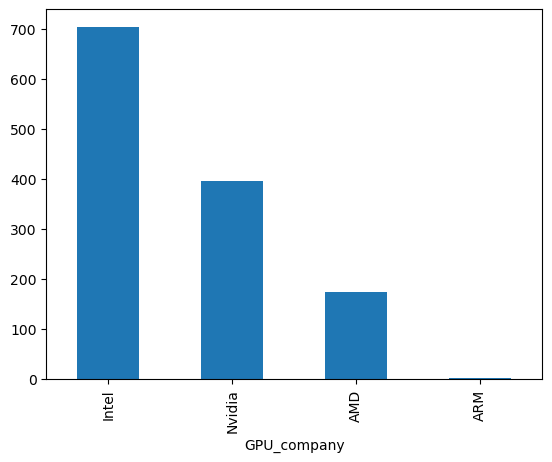

In [50]:
cat_data.GPU_company.value_counts().plot(kind='bar')

In [51]:
cat_data.Company.value_counts()/(cat_data.shape[0])*100

Company
Dell         22.823529
Lenovo       22.666667
HP           21.019608
Asus         11.921569
Acer          7.921569
MSI           4.235294
Toshiba       3.764706
Apple         1.647059
Samsung       0.705882
Razer         0.549020
Mediacom      0.549020
Microsoft     0.470588
Xiaomi        0.313725
Vero          0.313725
Chuwi         0.235294
Google        0.235294
Fujitsu       0.235294
LG            0.235294
Huawei        0.156863
Name: count, dtype: float64

<Axes: xlabel='Company'>

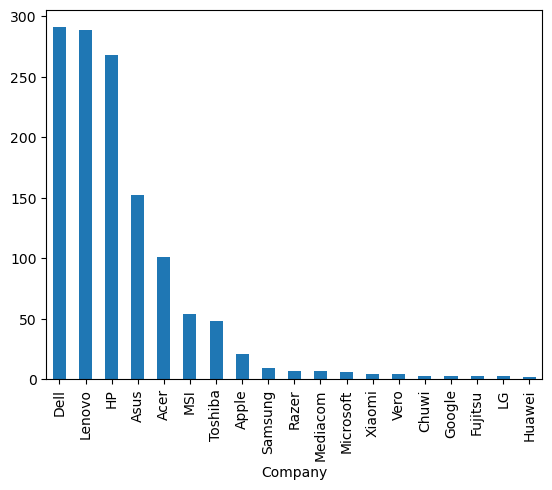

In [52]:
cat_data.Company.value_counts().plot(kind='bar')

In [53]:
cat_data.Product.value_counts()/(cat_data.shape[0])*100

Product
XPS 13                                           2.352941
Inspiron 3567                                    1.960784
250 G6                                           1.647059
Vostro 3568                                      1.490196
Legion Y520-15IKBN                               1.490196
ProBook 450                                      1.411765
Inspiron 5570                                    1.411765
Alienware 17                                     1.176471
Inspiron 5567                                    1.098039
Satellite Pro                                    1.019608
Latitude 5580                                    0.941176
EliteBook 840                                    0.941176
Aspire 3                                         0.941176
ThinkPad X1                                      0.941176
Inspiron 7567                                    0.784314
MacBook Pro                                      0.784314
EliteBook 850                                    0.784314
EliteB

In [54]:
cat_data.Screen.value_counts()/(cat_data.shape[0])*100

Screen
Full HD        65.490196
Standard       28.941176
4K Ultra HD     3.372549
Quad HD+        2.196078
Name: count, dtype: float64

<Axes: xlabel='Screen'>

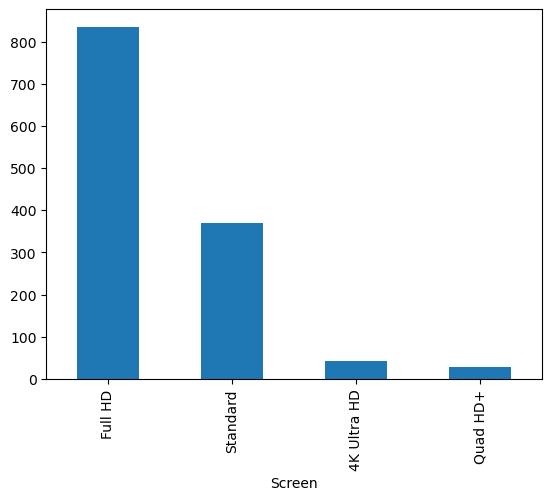

In [55]:
cat_data.Screen.value_counts().plot(kind='bar')

In [56]:
cat_data.GPU_company.value_counts()/(cat_data.shape[0])*100

GPU_company
Intel     55.215686
Nvidia    31.058824
AMD       13.647059
ARM        0.078431
Name: count, dtype: float64

<Axes: xlabel='GPU_company'>

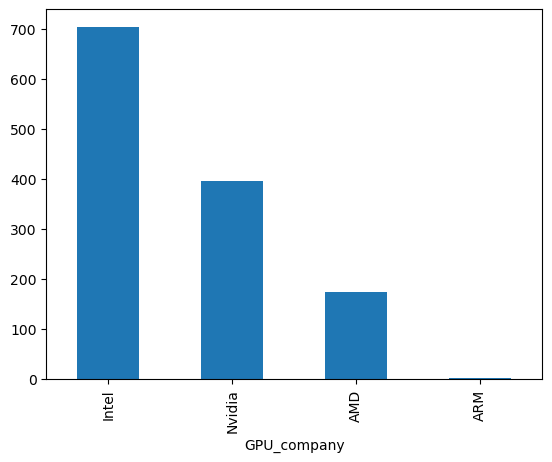

In [57]:
cat_data.GPU_company.value_counts().plot(kind='bar')

In [58]:
cat_data.GPU_model.value_counts()

GPU_model
HD Graphics 620            279
HD Graphics 520            181
UHD Graphics 620            68
GeForce GTX 1050            66
GeForce GTX 1060            48
GeForce 940MX               43
Radeon 530                  41
HD Graphics 500             39
HD Graphics 400             33
GeForce GTX 1070            30
GeForce GTX 1050 Ti         28
HD Graphics                 23
GeForce 930MX               20
Radeon R5 M430              20
Radeon 520                  17
GeForce MX150               15
Radeon R7 M445              14
HD Graphics 615             14
GeForce 920MX               13
HD Graphics 515             13
GeForce GTX 960M            12
HD Graphics 505             12
Radeon R5                   11
GeForce GTX 980M            10
Quadro M1200                 9
HD Graphics 405              9
Iris Plus Graphics 640       8
Radeon R5 M420               8
GeForce GTX 950M             7
GeForce MX130                6
GeForce GTX 1080             6
GeForce 930M                 

In [59]:
cat_data.drop(columns=['GPU_model','Company','Product','CPU_model'],inplace=True)

# do the One-Hot Encoding after merging the two datasets

In [60]:
num_data.columns

Index(['ID', 'Ram', 'PrimaryStorage', 'SecondaryStorage', 'log_Inches',
       'log_Weight', 'log_ScreenH', 'log_ScreenW', 'log_CPU_freq',
       'log_Price_euros'],
      dtype='object')

In [61]:
cat_data.columns

Index(['ID', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company'],
      dtype='object')

In [62]:
data = pd.merge(num_data,cat_data,how = 'inner',left_on = 'ID', right_on = 'ID')

In [63]:
data.head()

,ID,Ram,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,PrimaryStorageType,SecondaryStorageType,GPU_company
0,0,8,0,0,2.587764,0.314811,6.984716,7.56008,0.832909,7.200194,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,SSD,No,Intel
1,1,8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,6.801216,Ultrabook,macOS,Standard,No,No,No,Intel,Flash Storage,No,Intel
2,2,8,0,0,2.747271,0.620576,6.984716,7.56008,0.916291,6.354370,Notebook,No OS,Full HD,No,No,No,Intel,SSD,No,Intel
3,3,14,0,0,2.734368,0.604316,6.984716,7.56008,0.993252,7.838915,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,SSD,No,AMD
4,4,8,0,0,2.587764,0.314811,6.984716,7.56008,1.131402,7.497540,Ultrabook,macOS,Standard,No,Yes,Yes,Intel,SSD,No,Intel


In [64]:
data.shape

(1275, 20)

# applying One-Hot Encoding

In [66]:
print(cat_data.TypeName.nunique())
print(cat_data.OS.nunique())
print(cat_data.Screen.nunique())
print(cat_data.Touchscreen.nunique())
print(cat_data.IPSpanel.nunique())
print(cat_data.RetinaDisplay.nunique())
print(cat_data.CPU_company.nunique())
print(cat_data.PrimaryStorageType.nunique())
print(cat_data.SecondaryStorageType.nunique())
print(cat_data.GPU_company.nunique())

6
9
4
2
2
2
3
4
4
4


In [67]:
cat_data.columns

Index(['ID', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company'],
      dtype='object')

In [68]:
data.shape

(1275, 20)

In [70]:
data = pd.get_dummies(data, columns = ['TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       ], dtype = 'int')

In [71]:
data.shape

(1275, 50)

In [72]:
data.head()

,ID,Ram,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,Touchscreen_No,Touchscreen_Yes,IPSpanel_No,IPSpanel_Yes,RetinaDisplay_No,RetinaDisplay_Yes,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,0,8,0,0,2.587764,0.314811,6.984716,7.56008,0.832909,7.200194,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,1,8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,6.801216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,2,8,0,0,2.747271,0.620576,6.984716,7.56008,0.916291,6.354370,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,3,14,0,0,2.734368,0.604316,6.984716,7.56008,0.993252,7.838915,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,4,8,0,0,2.587764,0.314811,6.984716,7.56008,1.131402,7.497540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [73]:
data.drop(columns='ID',inplace=True)

In [74]:
data.head(3)

,Ram,PrimaryStorage,SecondaryStorage,log_Inches,log_Weight,log_ScreenH,log_ScreenW,log_CPU_freq,log_Price_euros,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,Touchscreen_No,Touchscreen_Yes,IPSpanel_No,IPSpanel_Yes,RetinaDisplay_No,RetinaDisplay_Yes,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,8,0,0,2.587764,0.314811,6.984716,7.56008,0.832909,7.200194,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,8,0,0,2.587764,0.292670,6.984716,7.56008,0.587787,6.801216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,8,0,0,2.747271,0.620576,6.984716,7.56008,0.916291,6.354370,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0


# Feature Engineering:

# Feature Addition, Feature Elimination: Correlational Analysis

In [75]:
corr = data.corrwith(data.log_Price_euros).abs().sort_values(ascending = False)

C:\Users\Dhanshree\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Dhanshree\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [76]:
corr

log_Price_euros                     1.000000e+00
Ram                                 7.424773e-01
PrimaryStorageType_SSD              5.912605e-01
TypeName_Notebook                   5.684161e-01
log_CPU_freq                        4.881129e-01
Screen_Standard                     4.820585e-01
PrimaryStorageType_HDD              4.615857e-01
TypeName_Gaming                     3.586860e-01
GPU_company_Nvidia                  3.530554e-01
SecondaryStorageType_No             3.291087e-01
Screen_Full HD                      3.288535e-01
SecondaryStorageType_HDD            3.196592e-01
PrimaryStorageType_Flash Storage    3.150854e-01
SecondaryStorage                    3.146148e-01
TypeName_Ultrabook                  3.137547e-01
IPSpanel_Yes                        2.789147e-01
IPSpanel_No                         2.789147e-01
Screen_4K Ultra HD                  2.453889e-01
CPU_company_Intel                   2.316483e-01
CPU_company_AMD                     2.313110e-01
OS_No OS            

Text(0.5, 1.0, 'Correlational Analysis of all the variables.')

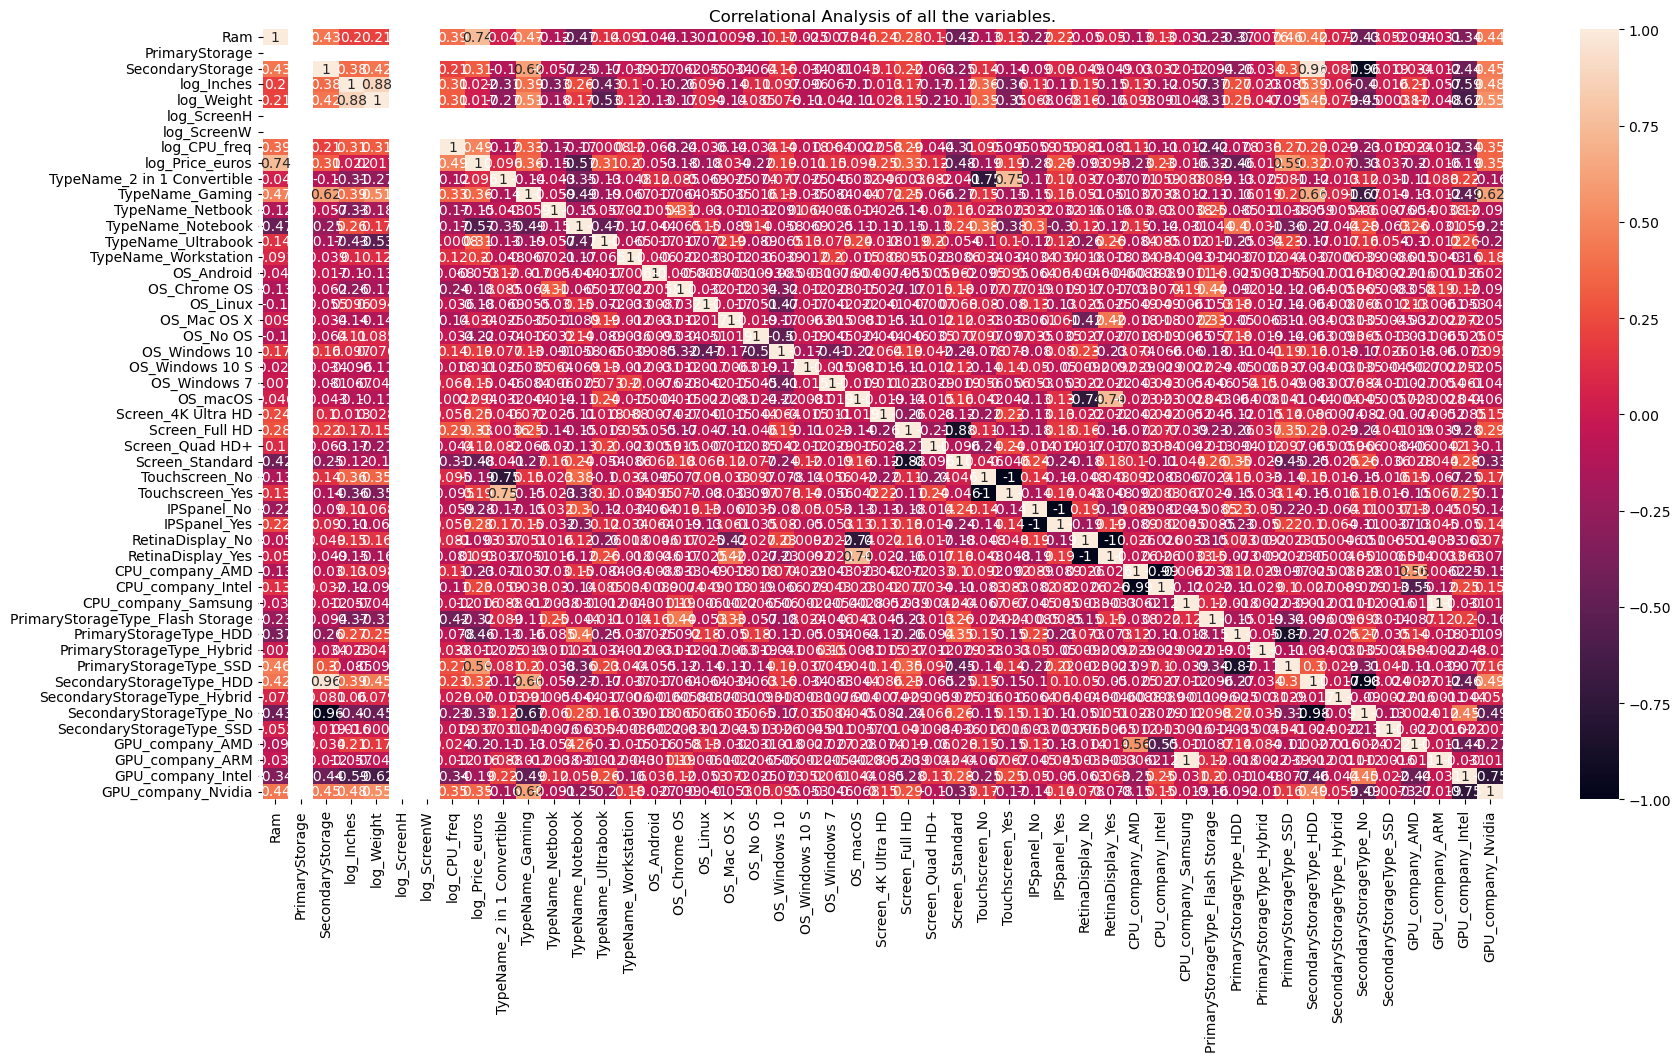

In [78]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)
plt.title("Correlational Analysis of all the variables.")

In [79]:
v = corr[np.abs(corr)>1.931717e-01]       # cut-off value=1.931717e-01

In [80]:
v

log_Price_euros                     1.000000
Ram                                 0.742477
PrimaryStorageType_SSD              0.591260
TypeName_Notebook                   0.568416
log_CPU_freq                        0.488113
Screen_Standard                     0.482058
PrimaryStorageType_HDD              0.461586
TypeName_Gaming                     0.358686
GPU_company_Nvidia                  0.353055
SecondaryStorageType_No             0.329109
Screen_Full HD                      0.328853
SecondaryStorageType_HDD            0.319659
PrimaryStorageType_Flash Storage    0.315085
SecondaryStorage                    0.314615
TypeName_Ultrabook                  0.313755
IPSpanel_Yes                        0.278915
IPSpanel_No                         0.278915
Screen_4K Ultra HD                  0.245389
CPU_company_Intel                   0.231648
CPU_company_AMD                     0.231311
OS_No OS                            0.217039
GPU_company_AMD                     0.202240
TypeName_W

In [81]:
v_list = list(v.index)

In [82]:
v_list

['log_Price_euros',
 'Ram',
 'PrimaryStorageType_SSD',
 'TypeName_Notebook',
 'log_CPU_freq',
 'Screen_Standard',
 'PrimaryStorageType_HDD',
 'TypeName_Gaming',
 'GPU_company_Nvidia',
 'SecondaryStorageType_No',
 'Screen_Full HD',
 'SecondaryStorageType_HDD',
 'PrimaryStorageType_Flash Storage',
 'SecondaryStorage',
 'TypeName_Ultrabook',
 'IPSpanel_Yes',
 'IPSpanel_No',
 'Screen_4K Ultra HD',
 'CPU_company_Intel',
 'CPU_company_AMD',
 'OS_No OS',
 'GPU_company_AMD',
 'TypeName_Workstation',
 'Touchscreen_No',
 'Touchscreen_Yes']

In [83]:
final_data=data[['log_Price_euros','Ram','PrimaryStorageType_SSD','TypeName_Notebook','log_CPU_freq','Screen_Standard','PrimaryStorageType_HDD',
'TypeName_Gaming','GPU_company_Nvidia','SecondaryStorageType_No','Screen_Full HD','SecondaryStorageType_HDD','PrimaryStorageType_Flash Storage',
'SecondaryStorage','TypeName_Ultrabook','IPSpanel_Yes','IPSpanel_No','Screen_4K Ultra HD','CPU_company_Intel','CPU_company_AMD','OS_No OS',
'GPU_company_AMD','TypeName_Workstation','Touchscreen_No','Touchscreen_Yes']]

In [84]:
final_data.head(10)

,log_Price_euros,Ram,PrimaryStorageType_SSD,TypeName_Notebook,log_CPU_freq,Screen_Standard,PrimaryStorageType_HDD,TypeName_Gaming,GPU_company_Nvidia,SecondaryStorageType_No,Screen_Full HD,SecondaryStorageType_HDD,PrimaryStorageType_Flash Storage,SecondaryStorage,TypeName_Ultrabook,IPSpanel_Yes,IPSpanel_No,Screen_4K Ultra HD,CPU_company_Intel,CPU_company_AMD,OS_No OS,GPU_company_AMD,TypeName_Workstation,Touchscreen_No,Touchscreen_Yes
0,7.200194,8,1,0,0.832909,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,6.801216,8,0,0,0.587787,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2,6.354370,8,1,1,0.916291,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
3,7.838915,14,1,0,0.993252,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
4,7.497540,8,1,0,1.131402,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
5,5.991465,4,0,1,1.098612,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
6,7.668547,14,0,0,0.788457,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0
7,7.055054,8,0,0,0.587787,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
8,7.309881,14,1,0,0.587787,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
9,6.646391,8,1,0,0.470004,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0


# Splitting the Training and Testing datasets

In [85]:
x=final_data.drop("log_Price_euros",axis=1)
y=final_data.log_Price_euros

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
x_train.shape

(1020, 24)

In [89]:
x_test.shape

(255, 24)

# linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr=LinearRegression()

In [92]:
lr=lr.fit(x_train,y_train)

In [93]:
lr.coef_

array([ 7.18753288e-02,  1.18678328e-01, -2.08145867e-01,  5.09234341e-01,
       -1.28712436e-01, -6.07604340e-02, -8.23294280e-02, -3.91050913e-03,
       -1.00806416e-01, -2.74735468e-02, -1.53382571e-02, -3.16093529e-01,
       -4.71728718e-05,  1.88483210e-01,  1.96700577e-02, -1.96700577e-02,
        1.70950207e-01, -2.13620832e-01, -6.10019713e-01, -3.12873153e-01,
       -5.08290482e-02,  3.79854149e-01, -2.45068854e-02,  2.45068854e-02])

In [94]:
lr.intercept_

6.351683309600666

In [95]:
pred1=lr.predict(x_test)

In [96]:
pred1.shape

(255,)

In [97]:
pred=lr.predict(x_train)

In [98]:
pred.shape

(1020,)

# Checking mean_squared_error,r2_score

In [99]:
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
print(r2_score(y_test,pred1))

0.7389538386317851


In [101]:
print(r2_score(y_train,pred))

0.7808395494646949


In [102]:
print(mean_squared_error(y_test,pred1))

0.08624890285094663


# using polynomial regression

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
poly=PolynomialFeatures(degree=2)

In [105]:
x_poly=poly.fit_transform(x)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=51)

In [107]:
x_poly.shape

(1275, 325)

In [108]:
y_train.shape

(1020,)

In [109]:
lr.fit(x_train,y_train)

LinearRegression()

***Checking overfitting***

In [110]:
lr.score(x_train,y_train)

0.7666663148450591

In [111]:
lr.score(x_test,y_test)

0.797834604161137

# L1 (lasso) regression

In [112]:
from sklearn.linear_model import Lasso,Ridge

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
l1=Lasso()

In [115]:
l1.fit(x_train,y_train)

Lasso()

In [116]:
pred2=l1.predict(x_test)

In [117]:
print(mean_squared_error(y_test,pred2))

0.2299216326605799


In [118]:
print(r2_score(y_test,pred2))

0.3041052391671274


In [119]:
l1.score(x_train,y_train)

0.2833469842516546

In [120]:
l1.score(x_test,y_test)

0.3041052391671274

# l2 (Ridge) Regression

In [121]:
l2=Ridge()

In [122]:
l2.fit(x_train,y_train)

Ridge()

In [123]:
pred3=l2.predict(x_test)

In [124]:
print(mean_squared_error(y_test,pred3))

0.08624172011367501


In [125]:
print(r2_score(y_test,pred3))

0.7389755783401281


In [126]:
l2.score(x_train,y_train)

0.7805901415531287

In [127]:
l2.score(x_test,y_test)

0.7389755783401281

# Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
dt=DecisionTreeRegressor()

In [130]:
dt=DecisionTreeRegressor(max_depth=4,max_features=7)

In [131]:
dt=dt.fit(x_train,y_train)

In [132]:
pred=dt.predict(x_train)

In [133]:
pred4=dt.predict(x_test)

# Checking mean_squared_error,r2_score

In [134]:
print(r2_score(y_train,pred))

0.7671067148919644


In [135]:
print(r2_score(y_test,pred4))

0.7025404279454036


In [136]:
print("r2_SCORE:",r2_score(y_test,pred4))

r2_SCORE: 0.7025404279454036


In [137]:
print("Train Error: ",dt.score(x_train,y_train))
pred=dt.predict(x_test)
print("---"*21)
print("Test Error: ",dt.score(x_test,y_test))
print("---"*21)
print("MSE:",mean_squared_error(y_test,pred4))

Train Error:  0.7671067148919644
---------------------------------------------------------------
Test Error:  0.7025404279454036
---------------------------------------------------------------
MSE: 0.09827978928229848


# Random forest regressor.

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [142]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [143]:
pred=rf.predict(x_train)

In [144]:
print("r2_SCORE:",r2_score(y_train,pred))

r2_SCORE: 0.9286990207903161


In [145]:
pred5=rf.predict(x_test)

In [146]:
print("r2_SCORE:",r2_score(y_test,pred5))

r2_SCORE: 0.7916960286114859


In [147]:
print("MSE:",mean_squared_error(y_test,pred5))

MSE: 0.06882303458357565


# Intalling Xgboost library

In [148]:
! pip install Xgboost

# Import XGB Random forest regressor.

In [149]:
from xgboost import XGBRFRegressor

In [150]:
xg=XGBRFRegressor(n_estimator=100,random_state=42,cv=6)

In [151]:
xg.fit(x_train,y_train)

C:\Users\Dhanshree\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, cv=6, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimator=100, n_estimators=None,
               n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', ...)

In [152]:
xg1=xg.fit(x,y)

C:\Users\Dhanshree\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:17:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


In [153]:
pred6=xg.predict(x_test)

In [154]:
print("r2_value :",r2_score(y_test,pred6))

r2_value : 0.8198861744504216


In [155]:
print("mean_squared_error :",mean_squared_error(y_test,pred6))

mean_squared_error : 0.0595090912676774


# Import joblib to save the model for future prediction.

In [156]:
import joblib

In [157]:
joblib.dump(xg,"Laptop_Sales_Analysis")

['Laptop_Sales_Analysis']

In [158]:
model=joblib.load("Laptop_Sales_Analysis")

# Prediction on new or unseen data.

In [161]:
model.predict(np.array([[31.08,27.03,25.23,29.01,21.93,33.77,23.30,16.42,33.02,20.80,33.91,29.10,27.58,20.52,21.45,21.80,14.28,23.14,
                         27.42,34.65,25.90,24.92,13.96,14.83]]))[0]

7.2340045

# Comparing the Accuracy

In [162]:
conclusion = pd.DataFrame({'Models':['lr','l1','l2','dt','rf','xg'],
              "ACC":[r2_score(y_test,pred1)*100,
                     r2_score(y_test,pred2)*100,
                     r2_score(y_test,pred3)*100,
                     r2_score(y_test,pred4)*100,
                     r2_score(y_test,pred5)*100,
                     r2_score(y_test,pred6)*100
                    ]})

In [163]:
conclusion

,Models,ACC
0,lr,73.895384
1,l1,30.410524
2,l2,73.897558
3,dt,70.254043
4,rf,79.169603
5,xg,81.988617


In [ ]:
# create a bar graph for logistic regression, decision tree, random forest, knn,naive bayes
models = ['lr','l1','l2','dt','rf','xg']
accuracy_values = [r2_score(y_test,pred1)*100,
                   r2_score(y_test,pred2)*100,
                   r2_score(y_test,pred3)*100,
                   r2_score(y_test,pred4)*100,
                   r2_score(y_test,pred5)*100,
                   r2_score(y_test,pred6)*100]


# plot the bar graph
bars = plt.bar(models, accuracy_values, color=['g','skyblue','c','m','gray','r'])

# add accuracy values on top of each bar
plt.bar_label(bars, labels=[f'{acc:.2f}' for acc in accuracy_values])

# add labes and title
plt.xlabel('Models')
plt.ylabel('Accuracy Values')
plt.title('Accuracy Comparison for Different Models')

# show the plot
plt.show()